In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  
import joblib

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

import os

os.chdir('/home/tiago/ubuntu/Ion_marker_pipeline')

data = pd.read_csv('20711/20711_1.tsv',sep='\t')


y = data.iloc[:,1]
X = data.drop(['File Scan', 'Class'], axis=1) #data.iloc[:,data.columns !='File Scan']


# Splitting arrays or matrices into random train and test subsets
# i.e. 70 % training dataset and 30 % test datasets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#Only for Shap plots
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.03)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.00009)


# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')  
#clf = RandomForestRegressor(n_estimators=100)
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

#joblib.dump(clf,'LYS.joblib')

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.9615384615384616


In [3]:
#print (data['Class'].value_counts())
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.03)
print (y_test.value_counts())


Class
NOT      25
20711     1
Name: count, dtype: int64


In [4]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 0,  1],
       [ 0, 25]])

Text(0.5, 0, 'Random Forest Feature Importance')

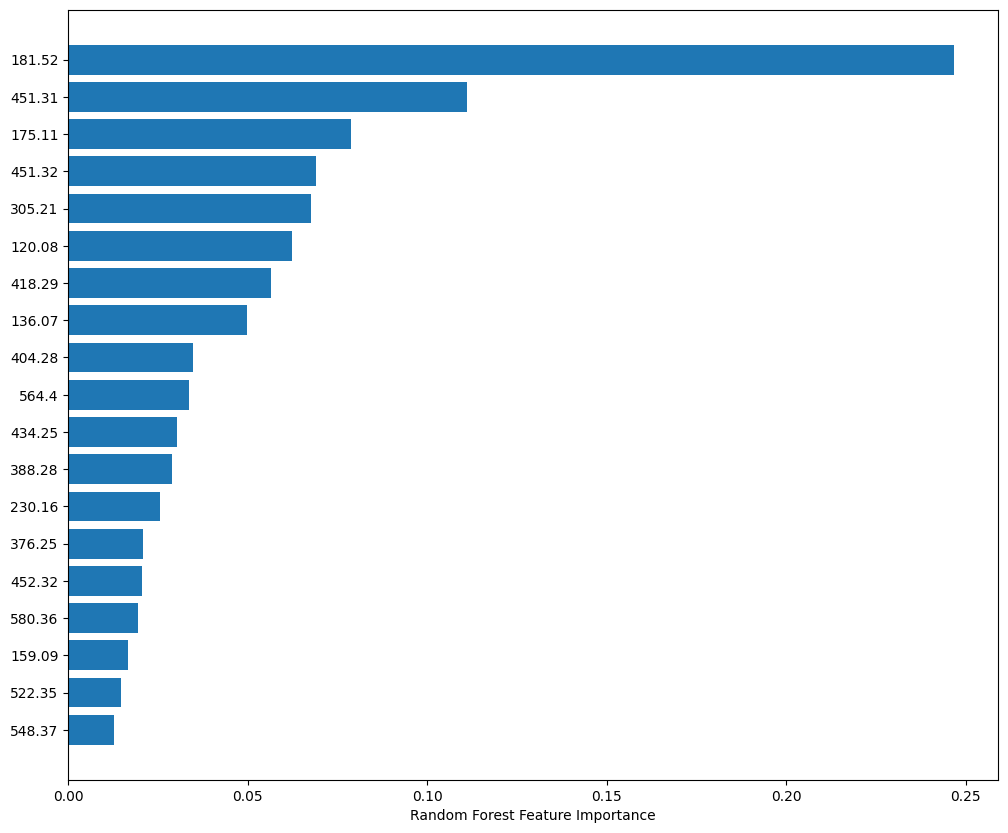

In [5]:
plt.rcParams.update({'figure.figsize': (12.0, 10.0)})
plt.rcParams.update({'font.size': 10})

x_aux_plot = data.iloc[:,2:].columns
sorted_idx = clf.feature_importances_.argsort()
plt.barh(x_aux_plot[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [6]:
explainer = shap.TreeExplainer(clf)
i=11
#print(y_test.head())
print(y_test.iloc[i])
print(data.iloc[y_test.index[i]][0])

choosen_instance = X_test.iloc[i]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)


20711
20240120_PWHF_HpH_75m50kMS2_7uL_HEK293_FCRN-OE_Lysate4hTrypsin_20711_Plex1_F14 30087


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       20711       0.00      0.00      0.00         0
         NOT       1.00      0.96      0.98        26

    accuracy                           0.96        26
   macro avg       0.50      0.48      0.49        26
weighted avg       1.00      0.96      0.98        26



Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


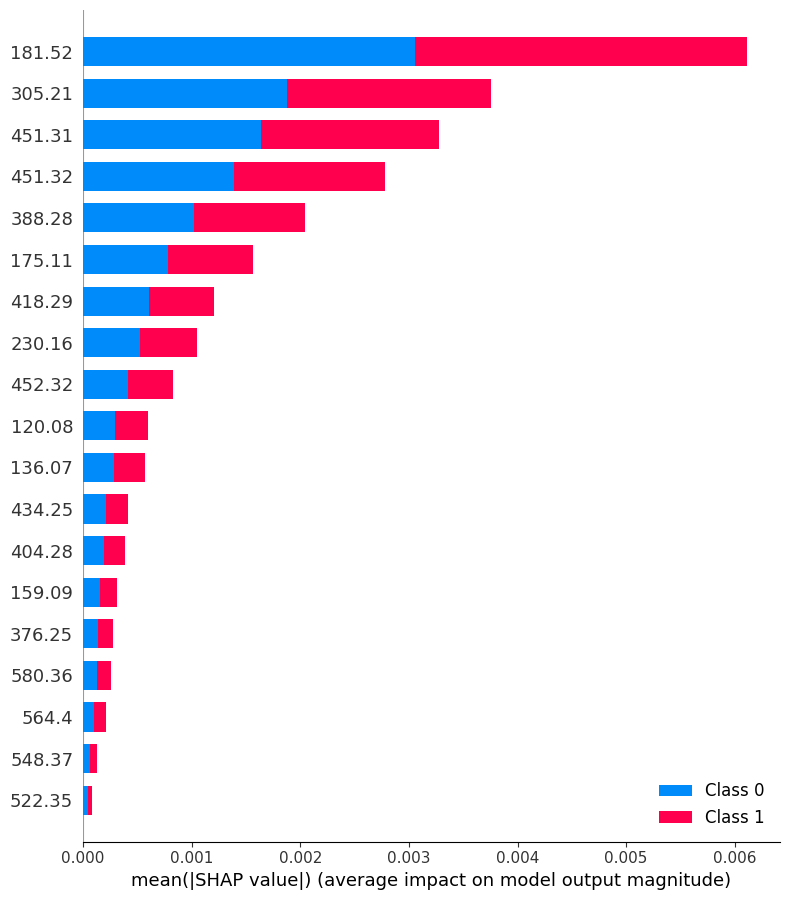

In [8]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

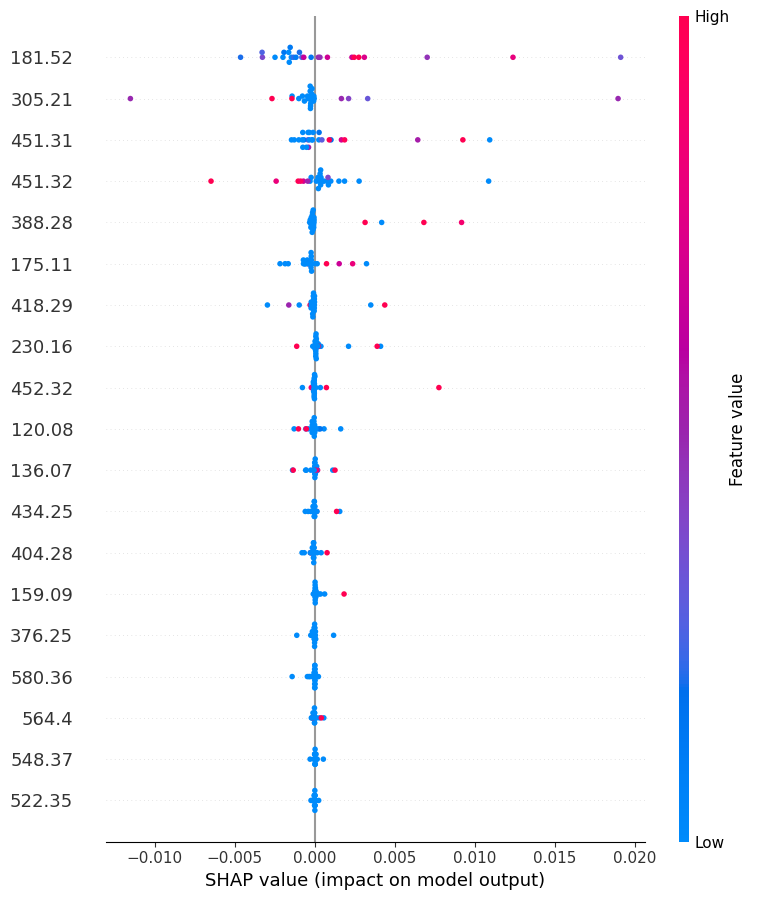

In [9]:
shap.summary_plot(shap_values[0], X_test)

In [ ]:
#shap.dependence_plot("197.12", shap_values[0], X_test,interaction_index="423.16")

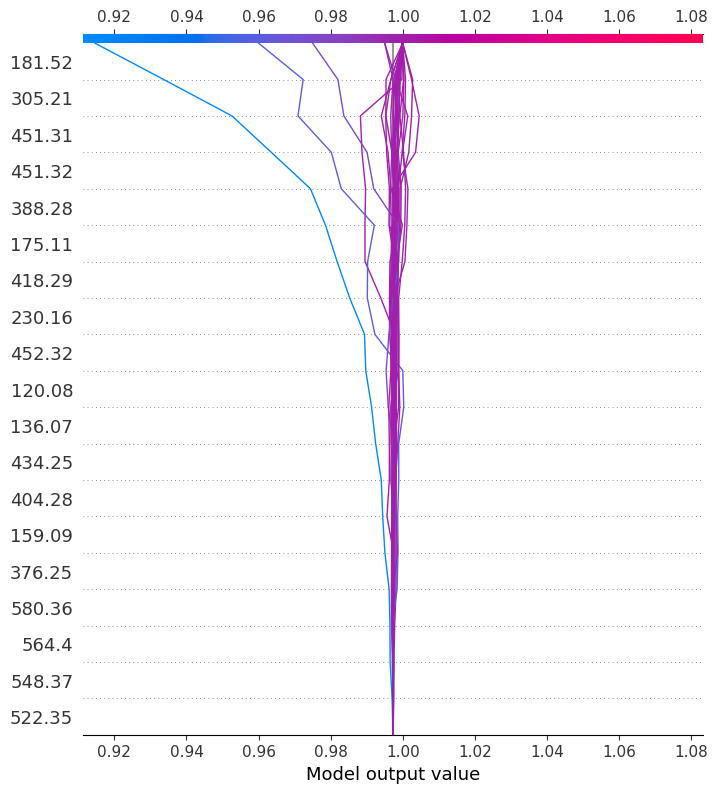

In [10]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)

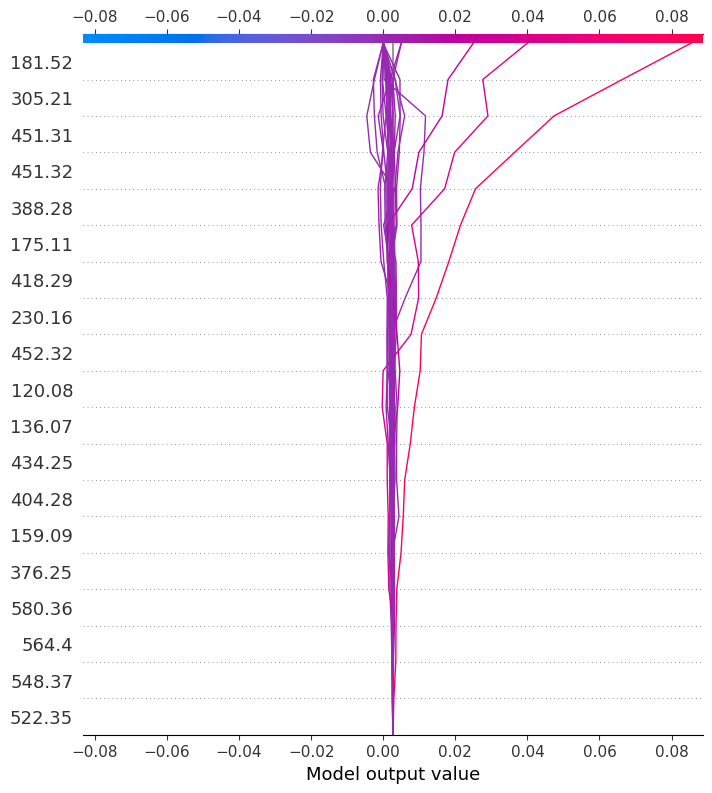

In [11]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns)

In [12]:
data['Class'].value_counts()
#y_test.value_counts()['NOT']

Class
NOT      281547
20711       763
Name: count, dtype: int64